<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Nov24-25/NN_ClasificacionMulticlase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probar diferentes arquitecturas para el problema de identificar números del 1 al 9. Usar los datos en DigitRecognition para el entrenamiento, validación y prueba. Mostrar gráficos de diagnostico, así como describir si las arquitecturas tienen algún problema de sesgo (bias) o varianza (variance).

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Importamos los datos
images = pd.read_csv("/content/drive/MyDrive/Machine Learning/Data/train.csv")

In [11]:
images.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
images.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
images.shape

(42000, 785)

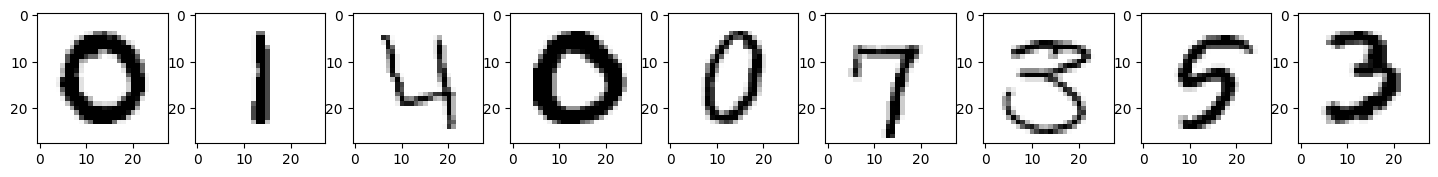

In [14]:
# Mostramos los primeros 9 datos
plt.figure(figsize=(20,20))
for i in range(1,10):
    q = images.iloc[i:i+1,1:].values
    plt.subplot(10,10,i)

    plt.imshow(q.reshape(28,28), cmap=plt.cm.binary)

In [18]:
# Normalizamos los datos

images = images/255

labels = images.label
numbers = images.drop(['label'], axis = 1)
numbers = numbers.to_numpy()

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,labels, test_size=0.10, random_state=42)

In [26]:
def ones(Y):
    ones_array = np.zeros((Y.size, 10))
    ones_array[np.arange(Y.size), np.array(Y, dtype=int)] = 1
    return ones_array

y_train = ones(y_train)
y_test = ones(y_test)

In [44]:
# Ahora utilizando Tensorflow
# 1 capa - 1 neurona

tf.random.set_seed(1234)  # applied to achieve reproducible results
model = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(1, activation='relu', name = 'layer1'),
        Dense(10, activation='softmax')
     ]
)

model.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1182/1182 [==============================] - 6s 4ms/step - loss: 0.5579 - accuracy: 0.9997
Epoch 2/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.3223 - accuracy: 1.0000
Epoch 3/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1354 - accuracy: 1.0000
Epoch 4/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0546 - accuracy: 1.0000
Epoch 5/10
1182/1182 [==============================] - 8s 7ms/step - loss: 0.0281 - accuracy: 1.0000
Epoch 6/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 7/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 8/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 9/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 10/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.005

In [46]:
lost, acc = model.evaluate(x_test, y_test)
print(lost, acc)

132/132 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
0.0018233343726024032 1.0


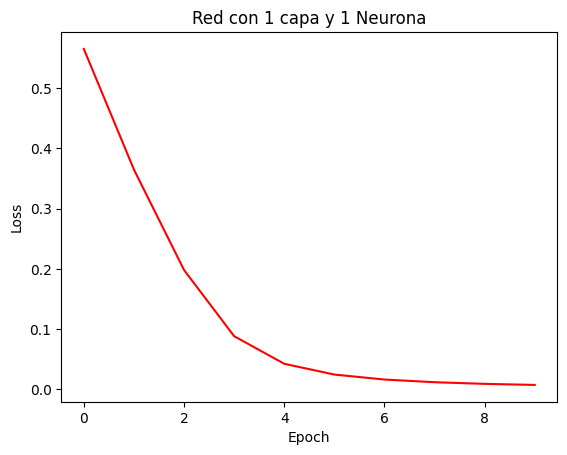

In [41]:
plt.plot(history.history['loss'], color = 'red')
plt.title('Red con 1 capa y 1 Neurona')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [45]:
# 2 capas - 3 neuronas

tf.random.set_seed(1234)  # applied to achieve reproducible results
model2 = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(3, activation='relu', name = 'layer1'),
        Dense(3, activation='relu', name = 'layer2'),
        Dense(10, activation='softmax')
     ]
)

model2.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history2 = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 2/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 3/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 4/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 5/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 6/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 7/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 8/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 10/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.001

In [47]:
lost, acc = model2.evaluate(x_test, y_test)
print(lost, acc)

132/132 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.1238
0.6931464076042175 0.12380952388048172


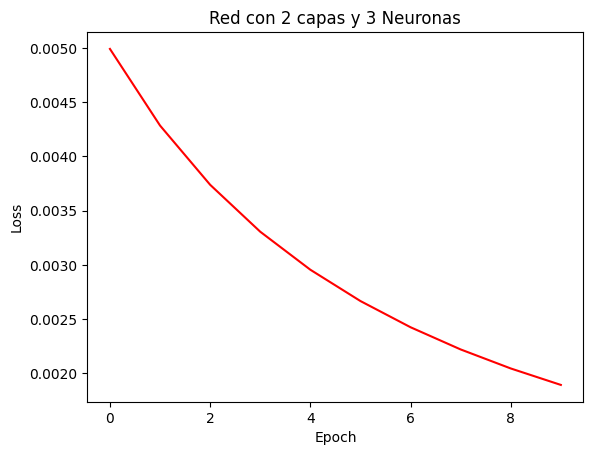

In [50]:
plt.plot(history2.history['loss'], color = 'red')
plt.title('Red con 2 capas y 3 Neuronas por capa')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [49]:
# 5 capas - 60 neuronas

tf.random.set_seed(1234)  # applied to achieve reproducible results
model3 = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(60, activation='relu', name = 'layer1'),
        Dense(60, activation='relu', name = 'layer2'),
        Dense(60, activation='relu', name = 'layer3'),
        Dense(60, activation='relu', name = 'layer4'),
        Dense(60, activation='relu', name = 'layer5'),
        Dense(10, activation='softmax')
     ]
)

model3.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history3 = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 3/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 5/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/10
1182/1182 [==============================] - 7s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.001

In [51]:
lost, acc = model3.evaluate(x_test, y_test)
print(lost, acc)

132/132 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.1507
0.6931463479995728 0.15071429312229156


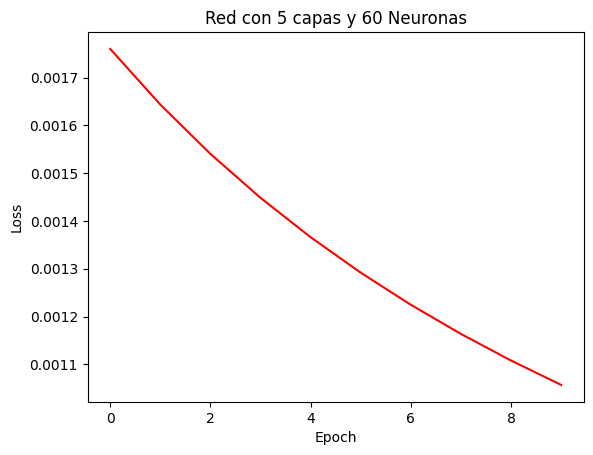

In [53]:
plt.plot(history3.history['loss'], color = 'red')
plt.title('Red con 5 capas y 60 Neuronas por capa')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [54]:
# 1 capa - 100 neuronas

tf.random.set_seed(1234)  # applied to achieve reproducible results
model4 = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(100, activation='relu', name = 'layer1'),
        Dense(10, activation='softmax')
     ]
)

model4.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history4 = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1182/1182 [==============================] - 8s 6ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 2/10
1182/1182 [==============================] - 5s 5ms/step - loss: 9.6677e-04 - accuracy: 1.0000
Epoch 3/10
1182/1182 [==============================] - 5s 5ms/step - loss: 9.2687e-04 - accuracy: 1.0000
Epoch 4/10
1182/1182 [==============================] - 5s 4ms/step - loss: 8.8990e-04 - accuracy: 1.0000
Epoch 5/10
1182/1182 [==============================] - 4s 3ms/step - loss: 8.5555e-04 - accuracy: 1.0000
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 8.2358e-04 - accuracy: 1.0000
Epoch 7/10
1182/1182 [==============================] - 3s 3ms/step - loss: 7.9372e-04 - accuracy: 1.0000
Epoch 8/10
1182/1182 [==============================] - 6s 5ms/step - loss: 7.6579e-04 - accuracy: 1.0000
Epoch 9/10
1182/1182 [==============================] - 4s 3ms/step - loss: 7.3963e-04 - accuracy: 1.0000
Epoch 10/10
1182/1182 [===========================

In [55]:
lost, acc = model4.evaluate(x_test, y_test)
print(lost, acc)

132/132 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.0145
0.6931464076042175 0.014523809775710106


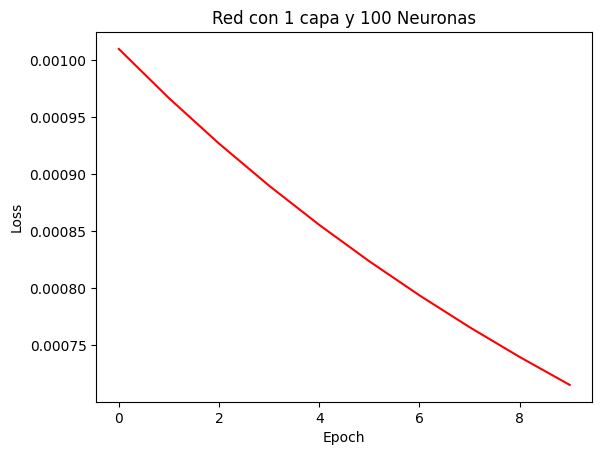

In [58]:
plt.plot(history4.history['loss'], color = 'red')
plt.title('Red con 1 capa y 100 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [57]:
# 10 capas - 2 neuronas

tf.random.set_seed(1234)  # applied to achieve reproducible results
model5 = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(2, activation='relu', name = 'layer1'),
        Dense(2, activation='relu', name = 'layer2'),
        Dense(2, activation='relu', name = 'layer3'),
        Dense(2, activation='relu', name = 'layer4'),
        Dense(2, activation='relu', name = 'layer5'),
        Dense(2, activation='relu', name = 'layer6'),
        Dense(2, activation='relu', name = 'layer7'),
        Dense(2, activation='relu', name = 'layer8'),
        Dense(2, activation='relu', name = 'layer9'),
        Dense(2, activation='relu', name = 'layer10'),
        Dense(10, activation='softmax')
     ]
)

model5.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history5 = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1182/1182 [==============================] - 5s 4ms/step - loss: 6.9196e-04 - accuracy: 1.0000
Epoch 2/10
1182/1182 [==============================] - 5s 5ms/step - loss: 6.7023e-04 - accuracy: 1.0000
Epoch 3/10
1182/1182 [==============================] - 3s 2ms/step - loss: 6.4970e-04 - accuracy: 1.0000
Epoch 4/10
1182/1182 [==============================] - 3s 2ms/step - loss: 6.3031e-04 - accuracy: 1.0000
Epoch 5/10
1182/1182 [==============================] - 10s 9ms/step - loss: 6.1196e-04 - accuracy: 1.0000
Epoch 6/10
1182/1182 [==============================] - 4s 4ms/step - loss: 5.9457e-04 - accuracy: 1.0000
Epoch 7/10
1182/1182 [==============================] - 3s 2ms/step - loss: 5.7805e-04 - accuracy: 1.0000
Epoch 8/10
1182/1182 [==============================] - 4s 3ms/step - loss: 5.6243e-04 - accuracy: 1.0000
Epoch 9/10
1182/1182 [==============================] - 4s 3ms/step - loss: 5.4745e-04 - accuracy: 1.0000
Epoch 10/10
1182/1182 [======================

In [59]:
lost, acc = model5.evaluate(x_test, y_test)
print(lost, acc)

132/132 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 1.0000
0.6931464076042175 1.0


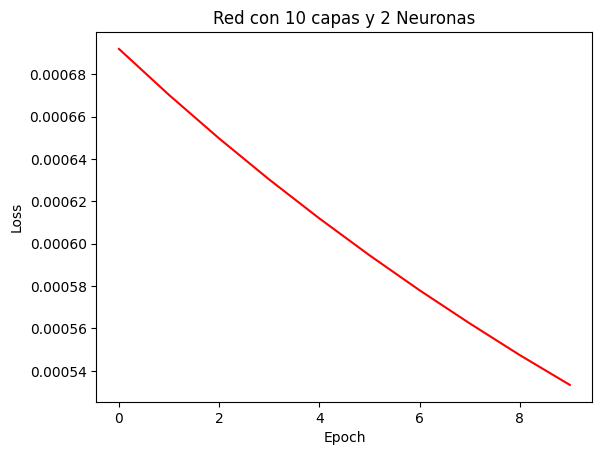

In [61]:
plt.plot(history5.history['loss'], color = 'red')
plt.title('Red con 10 capas y 2 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Observamos como mientras mas neuronas agregamos a nuestras arquitecturas, mejora bastante la regresion acercandonos cada vez a una linea recta y al parecer mejora bastante tambien al incluir multiples capas (aunque estas no contengan tantas neuronas).